In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cleaned_glassdoor_jobs.csv')

In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'





##  Job description length

##  Competitor count

## hourly wage to annual

#remove new line from job title

In [5]:
## Job title and seniority
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)

In [6]:
print(df.job_simp.value_counts())
print(' ')
print(df.seniority.value_counts())

job_simp
data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64
 
seniority
na        520
senior    220
jr          2
Name: count, dtype: int64


In [7]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority'],
      dtype='object')

In [8]:
##  Fix state Los Angeles
df['job_state'] = df['job_state'].apply(lambda x: x.strip().lower() if x.strip() != 'los angeles' else 'CA')
df['job_state'].value_counts()

job_state
ca             151
ma             103
ny              72
va              41
il              40
md              35
pa              33
tx              28
wa              21
nc              21
nj              17
fl              16
oh              14
tn              13
dc              11
co              11
wi              10
in              10
ut              10
az               9
mo               9
al               8
ga               6
ky               6
de               6
mi               6
ct               5
ia               5
la               4
or               4
ne               4
nm               3
ks               3
id               2
mn               2
los angeles      1
ri               1
sc               1
Name: count, dtype: int64

In [9]:
#fix competitor field
df['num_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != 1 else 0)
print(df['num_Competitors'])

0      1
1      1
2      1
3      3
4      3
      ..
737    3
738    3
739    1
740    1
741    1
Name: num_Competitors, Length: 742, dtype: int64


In [10]:
#hourly wage to annual

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [11]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [12]:
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n',''))
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [13]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,num_Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,49.389488,0.528302,0.001348,0.225067,0.237197,0.522911,1.673854
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.962906,0.499535,0.036711,0.417908,0.425651,0.499812,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


<Axes: >

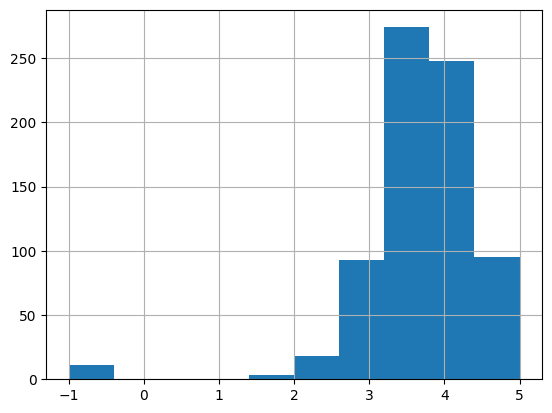

In [14]:
df.Rating.hist()

<Axes: >

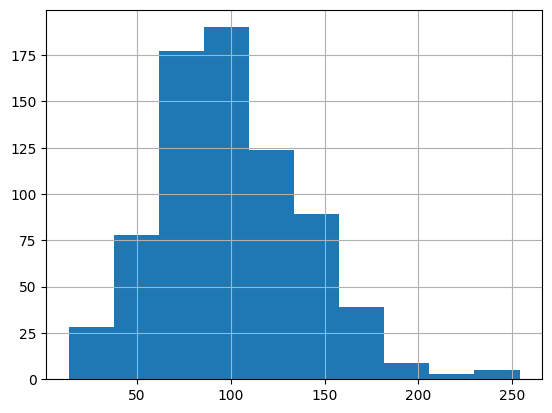

In [15]:
df.avg_salary.hist()

<Axes: >

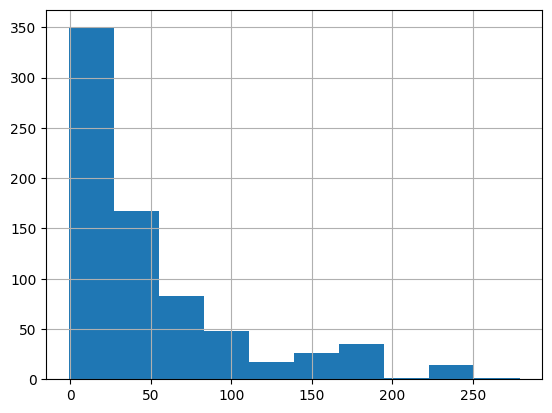

In [16]:
df.age.hist()

<Axes: >

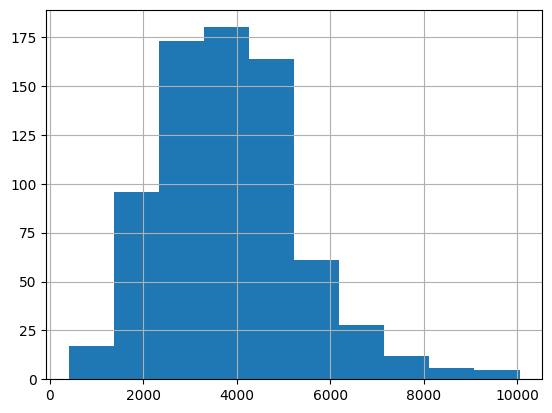

In [17]:
#jd length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df.desc_len.hist()

Text(0, 0.5, 'Values')

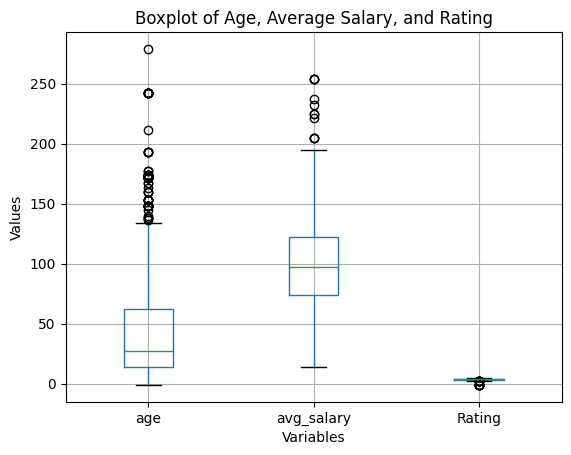

In [18]:
df.boxplot(column = ['age','avg_salary','Rating'])
plt.title('Boxplot of Age, Average Salary, and Rating')
plt.xlabel('Variables')
plt.ylabel('Values')

<Axes: >

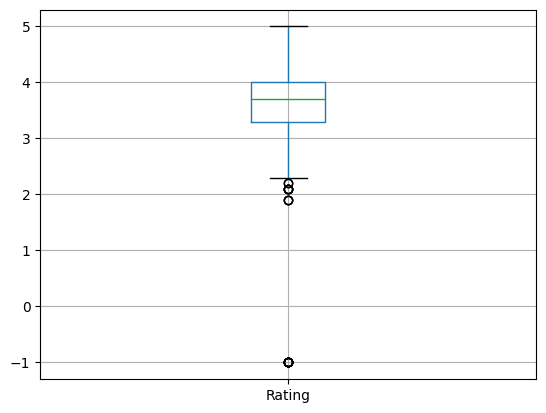

In [19]:
df.boxplot(column = 'Rating')

In [20]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019410,0.026164,0.164730
avg_salary,0.019410,1.000000,0.013492,0.078808
Rating,0.026164,0.013492,1.000000,-0.012281
desc_len,0.164730,0.078808,-0.012281,1.000000


<Axes: >

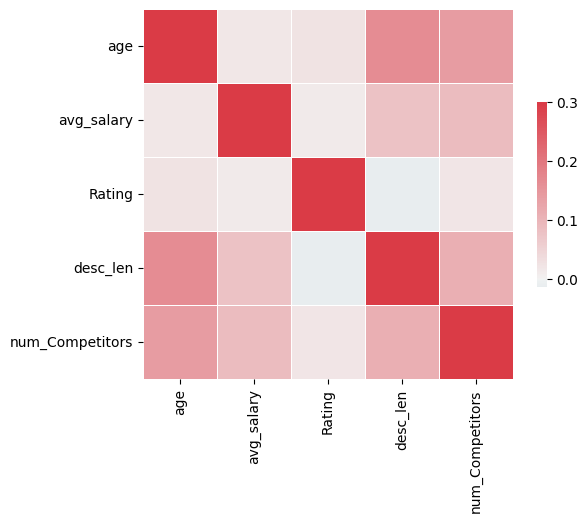

In [21]:
#seaborn correlation heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_Competitors']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'num_Competitors', 'desc_len'],
      dtype='object')

In [34]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'r_studio_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

graph for Location: total = 200


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


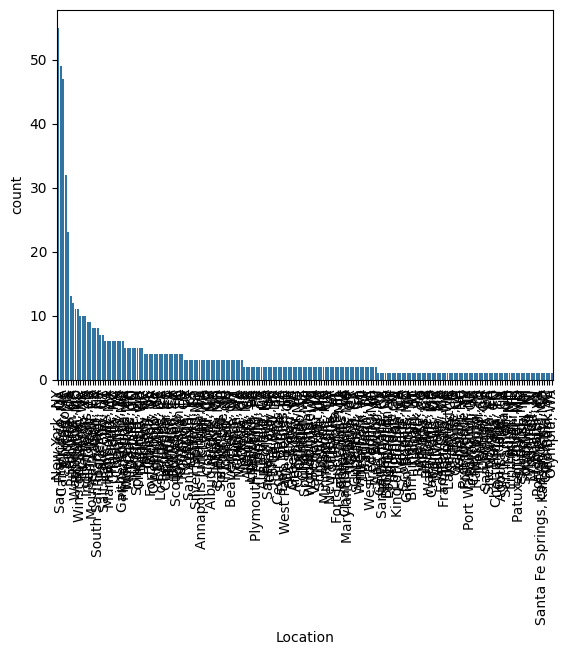

graph for Headquarters: total = 198


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


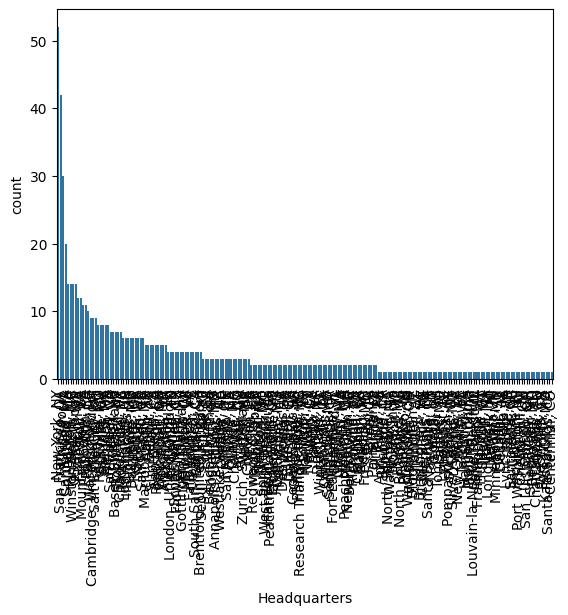

graph for Size: total = 9


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


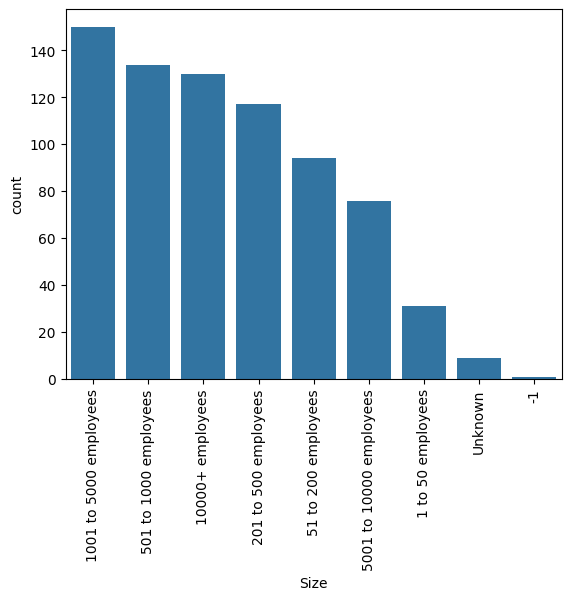

graph for Type of ownership: total = 11


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


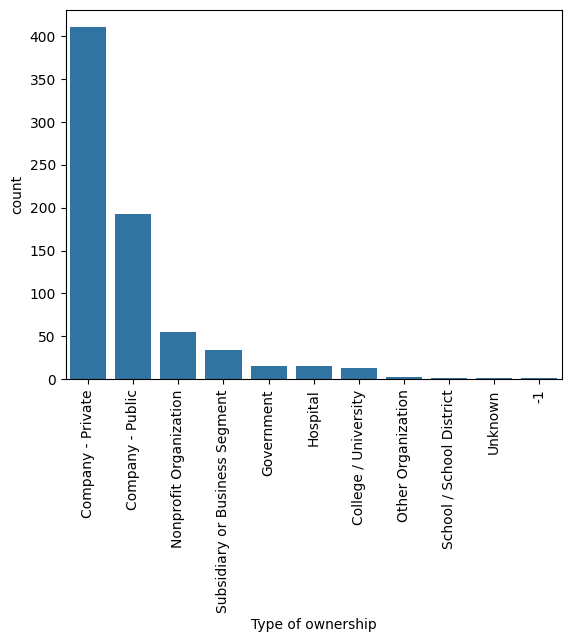

graph for Industry: total = 60


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


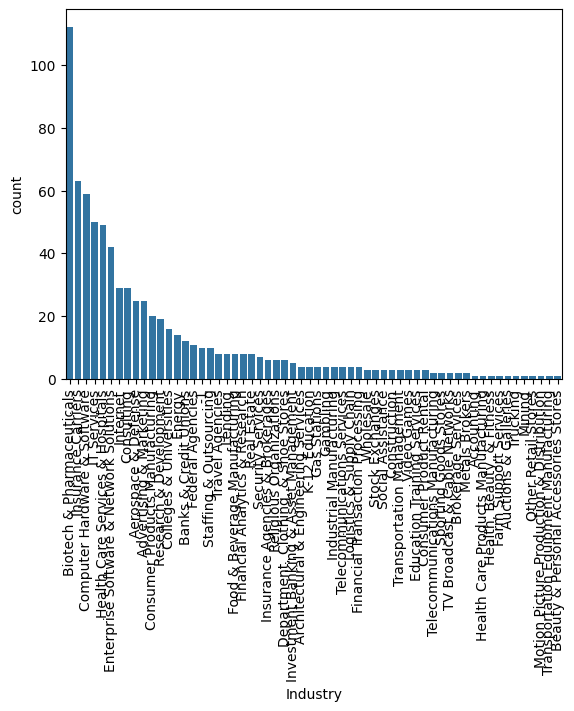

graph for Sector: total = 25


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


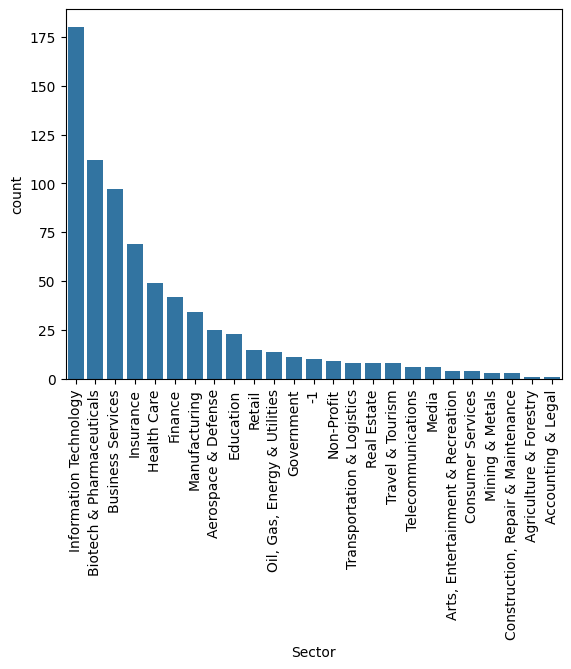

graph for Revenue: total = 14


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


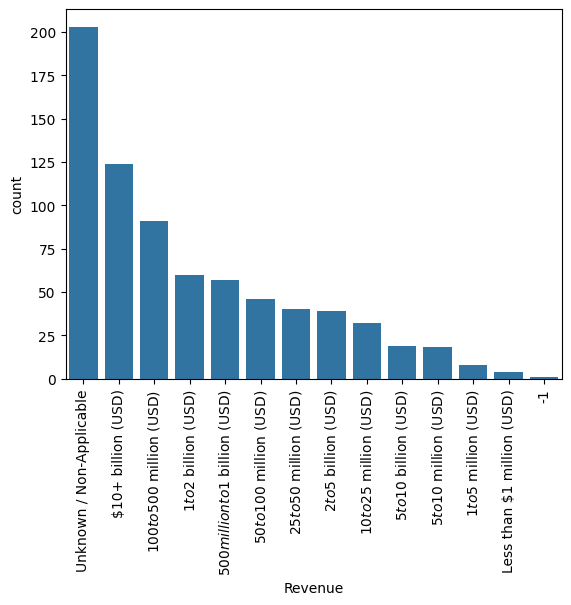

graph for company_txt: total = 343


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


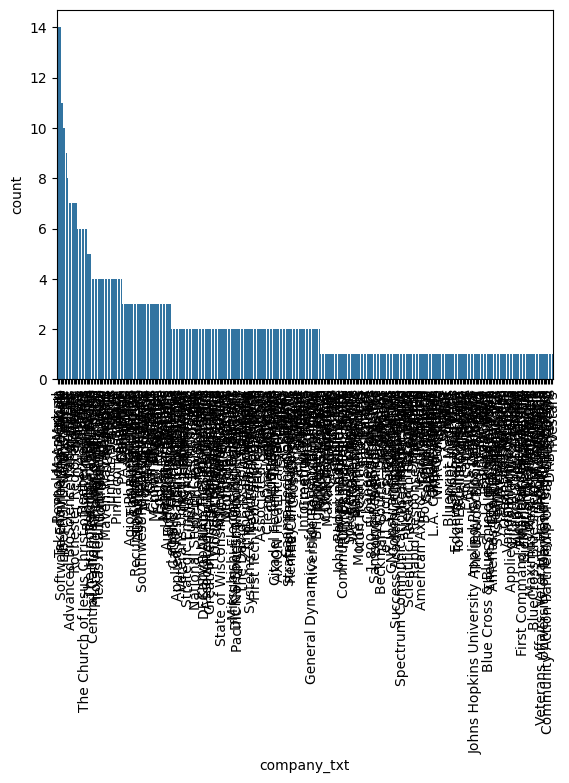

graph for job_state: total = 38


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


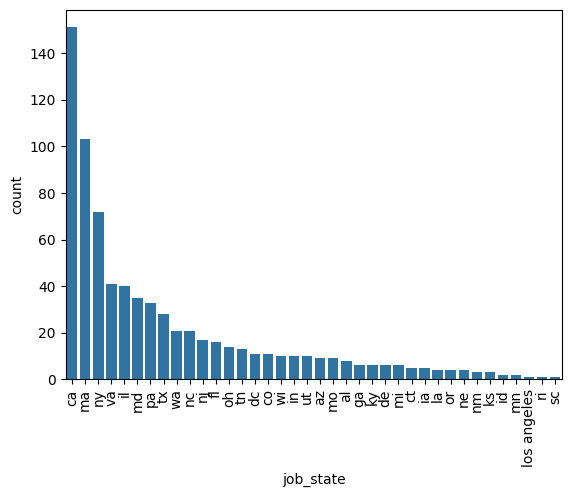

graph for same_state: total = 2


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


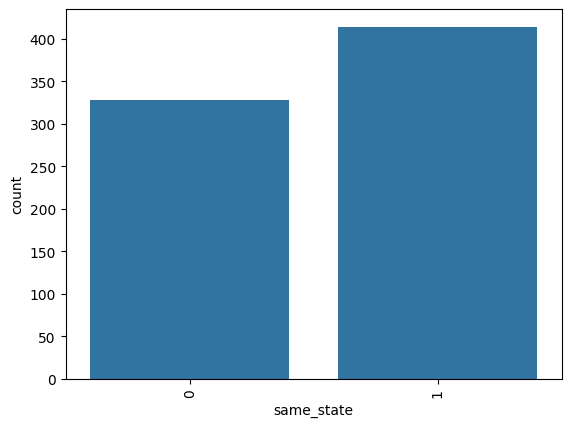

graph for python_yn: total = 2


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


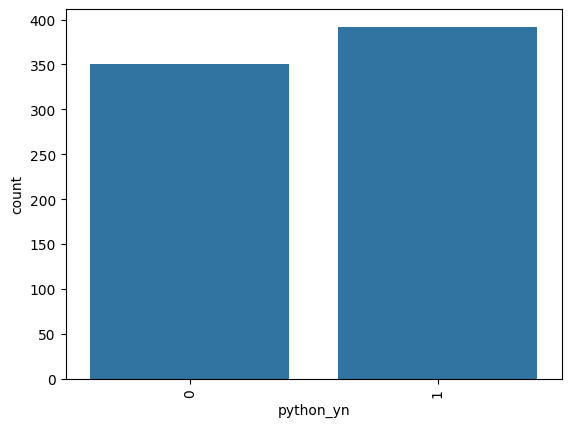

graph for r_studio_yn: total = 2


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


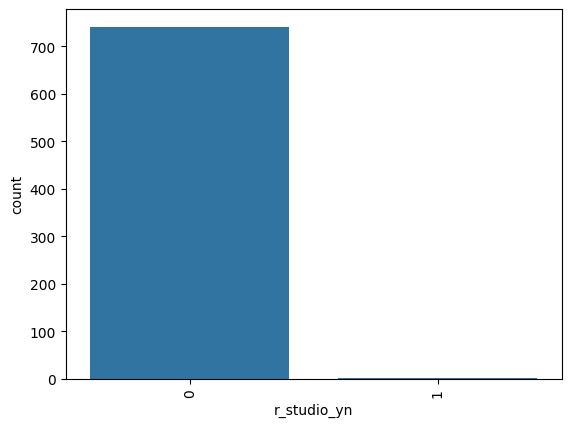

graph for spark_yn: total = 2


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


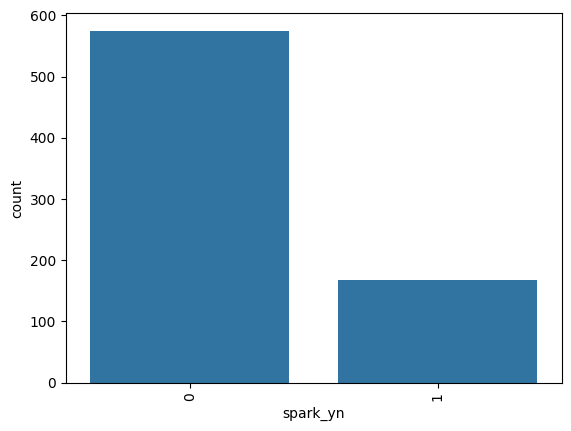

graph for aws_yn: total = 2


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


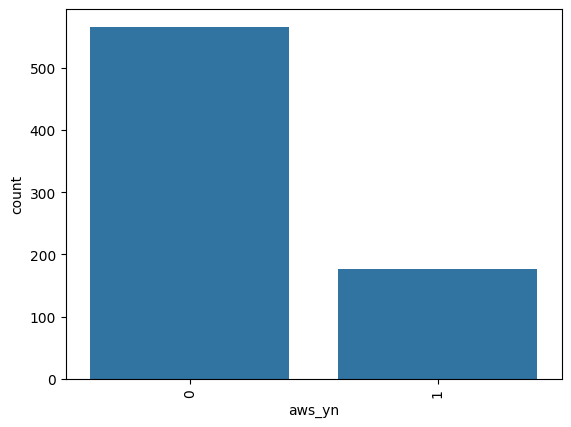

graph for excel_yn: total = 2


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


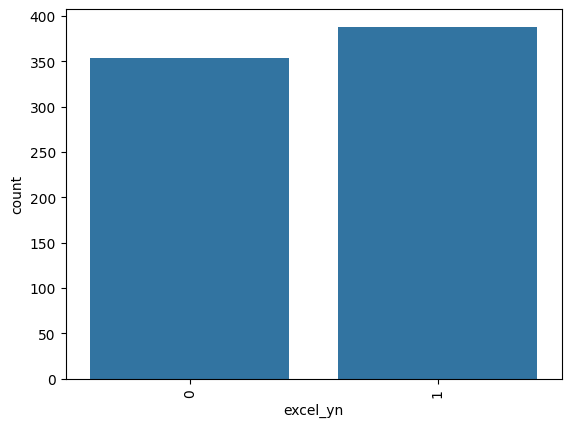

graph for job_simp: total = 7


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


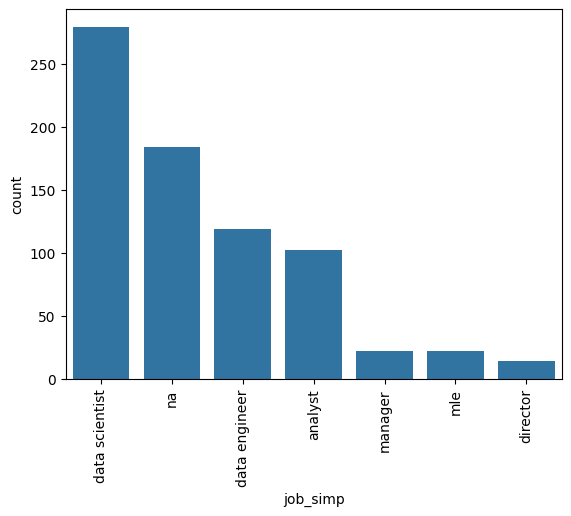

graph for seniority: total = 3


<ipython-input-24-190053f17006>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


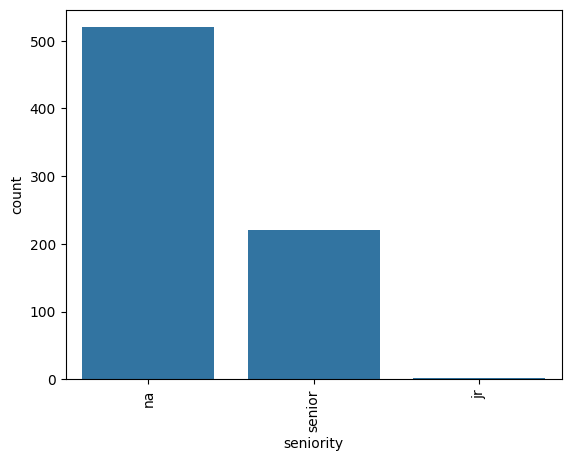

In [24]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart= sns.barplot(x=cat_num.index, y=cat_num)
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location total = 20


<ipython-input-45-f3d51b601c0d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


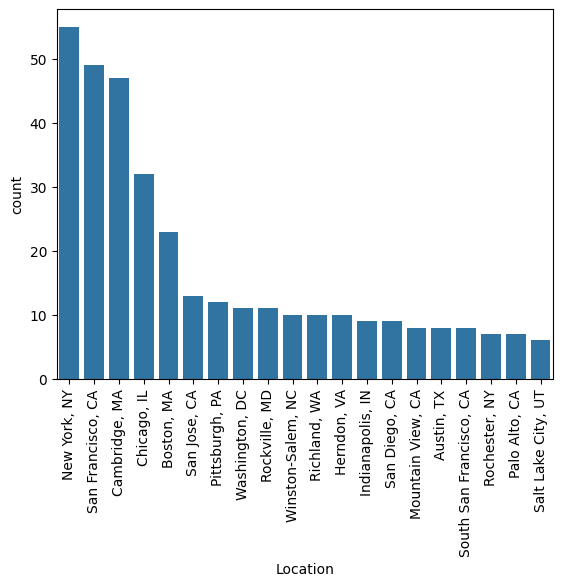

graph for Headquarters total = 20


<ipython-input-45-f3d51b601c0d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


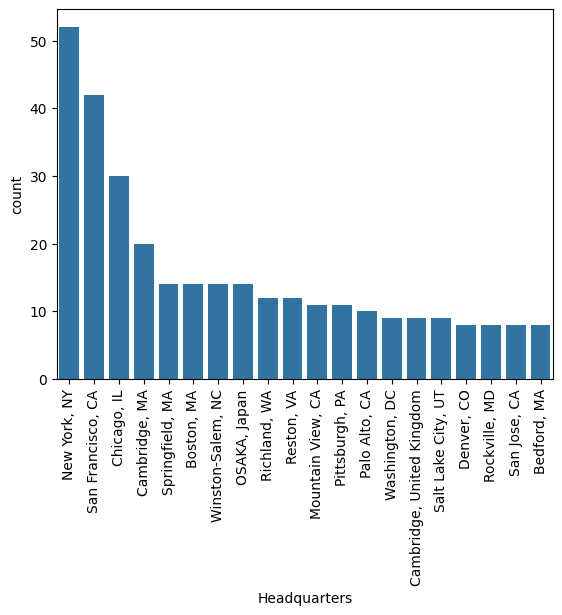

graph for company_txt total = 20


<ipython-input-45-f3d51b601c0d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


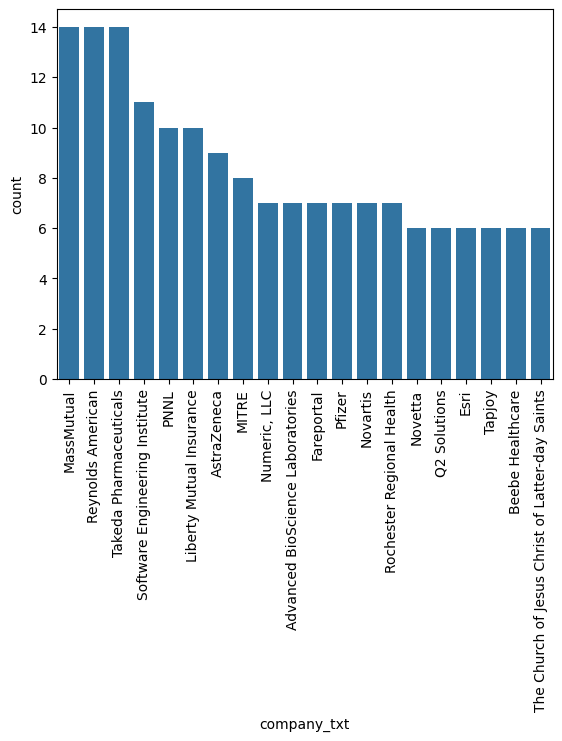

In [45]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'r_studio_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

for i in ['Location', 'Headquarters','company_txt']:
  cat_num=df_cat[i].value_counts()[:20]
  print('graph for %s total = %d' %  (i, len(cat_num)) )
  chart= sns.barplot(x=cat_num.index, y=cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.show()


In [55]:
df_pivot = df.pivot_table(index='job_simp', values='avg_salary')
print(df_pivot)



                avg_salary
job_simp                  
analyst          65.857843
data engineer   105.403361
data scientist  117.564516
director        168.607143
manager          84.022727
mle             126.431818
na               84.853261


In [65]:
pd.pivot_table(df, index=['job_simp','seniority'], values='avg_salary')


avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [75]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state','job_simp','seniority'], values='avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state   job_simp       seniority            
wi          na             na          54.000000
            data scientist senior     100.500000
                           na         120.000000
            analyst        na          58.833333
wa          na             na          97.500000
            data scientist senior     124.312500
                           na          77.944444
            analyst        na          54.500000
va          data scientist jr         106.500000
            analyst        na          70.833333
                           senior      72.333333
            data engineer  na          96.888889
                           senior      97.000000
            na             na          82.000000
            data scientist na         103.541667
                           senior     120.500000
            mle            na          87.000000
            na             senior      77.500000
ut          data engineer  na         100.333333
            analyst        na          54.750000
            data scientist senior     140.500000
tx          na             na          29.200000
            data scientist senior     100.666667
                           na         100.750000
            data engineer  senior     138.500000
                           na         104.583333
            na             senior      71.500000
tn          data engineer  senior     101.875000
            data scientist na          96.000000
            data engineer  na          97.250000
            analyst        senior      13.500000
sc          na             na          60.500000
ri          analyst        senior     100.000000
pa          analyst        na          49.000000
                           senior      69.500000
            data scientist senior     155.000000
            analyst        jr          56.500000
            data engineer  na          91.500000
            data scientist na         105.000000
            manager        na         109.666667
            mle            na         115.833333
                           senior     124.000000
            na             na          52.300000
                           senior     115.666667
or          data scientist na          98.500000
            data engineer  na          73.000000
oh          data scientist na         101.000000
            analyst        na          53.875000
            data scientist senior     107.000000
            na             na          91.166667
ny          analyst        na          62.944444
            na             senior      84.500000
                           na          78.666667
            mle            na         125.000000
            data scientist senior     146.750000
                           na         104.750000
            data engineer  na          86.375000
            analyst        senior      70.400000
nm          data scientist na          74.333333
nj          manager        na         109.500000
            director       na         161.500000
            data scientist senior      98.500000
                           na         115.250000
            data engineer  na         112.000000
            analyst        senior     109.333333
                           na          57.833333
            na             na          82.500000
ne          na             na          41.000000
nc          data scientist na         102.000000
            data engineer  na          88.833333
                           senior     119.666667
            na             senior      88.055556
            data scientist senior     124.500000
            na             na          99.500000
mo          analyst        na          61.000000
            na             na          72.333333
            manager        na          40.500000
            data scientist na         127.666667
mn          analyst        na          76.000000
            data engineer  na          95.000000
mi          manager 

In [78]:
pd.pivot_table(df, index=['job_state','job_simp','seniority'], values='avg_salary', aggfunc= 'count').sort_values('job_state', ascending = False)

avg_salary
job_state   job_simp       seniority            
wi          na             na                  4
            data scientist senior              1
                           na                  2
            analyst        na                  3
wa          na             na                  1
            data scientist senior              8
                           na                  9
            analyst        na                  3
va          data scientist jr                  1
            analyst        na                  3
                           senior              3
            data engineer  na                  9
                           senior              1
            na             na                  2
            data scientist na                 12
                           senior              5
            mle            na                  2
            na             senior              3
ut          data engineer  na                  3
            analyst        na                  4
            data scientist senior              3
tx          na             na                  5
            data scientist senior              3
                           na                 10
            data engineer  senior              2
                           na                  6
            na             senior              2
tn          data engineer  senior              8
            data scientist na                  1
            data engineer  na                  2
            analyst        senior              2
sc          na             na                  1
ri          analyst        senior              1
pa          analyst        na                  2
                           senior              5
            data scientist senior              1
            analyst        jr                  1
            data engineer  na                  1
            data scientist na                  5
            manager        na                  3
            mle            na                  3
                           senior              4
            na             na                  5
                           senior              3
or          data scientist na                  3
            data engineer  na                  1
oh          data scientist na                  2
            analyst        na                  4
            data scientist senior              5
            na             na                  3
ny          analyst        na                  9
            na             senior              6
                           na                  6
            mle            na                  2
            data scientist senior             10
                           na                 30
            data engineer  na                  4
            analyst        senior              5
nm          data scientist na                  3
nj          manager        na                  2
            director       na                  2
            data scientist senior              2
                           na                  2
            data engineer  na                  2
            analyst        senior              3
                           na                  3
            na             na                  1
ne          na             na                  4
nc          data scientist na                  1
            data engineer  na                  3
                           senior              3
            na             senior              9
            data scientist senior              2
            na             na                  3
mo          analyst        na                  2
            na             na                  3
            manager        na                  1
            data scientist na                  3
mn          analyst        na                  1
            data engineer  na                  1
mi          manager 

In [82]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index=['job_state'], values='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
dc,149.000000
ca,143.044776
ut,140.500000
mo,127.666667
il,117.233333
nc,117.000000
ny,115.250000
ma,113.750000
wi,113.500000


In [ ]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [85]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'num_Competitors', 'desc_len'],
      dtype='object')

In [86]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_Competitors', 'hourly', 'employer_provided', 'python_yn', 'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [99]:
for i in df_pivots.columns:

  try:
    #if i != 'avg_salary':
      print(pd.pivot_table(df_pivots, index= i , values= 'avg_salary').sort_values('avg_salary', ascending = False))
  except Exception as e:
     print(f'Could not create pivot table for {i} due to {e}\n')


        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
Br

In [108]:
df_pivots.Revenue.value_counts()

Revenue
Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: count, dtype: int64

In [120]:
pd.pivot_table(df_pivots, index = ['Revenue'], columns = ['python_yn'], values = 'avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [124]:
 import nltk
 nltk.download('stopwords')
 nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

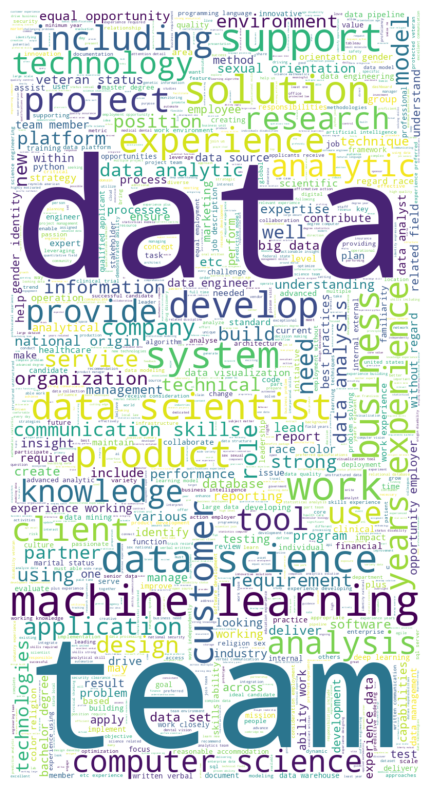

In [126]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()